In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

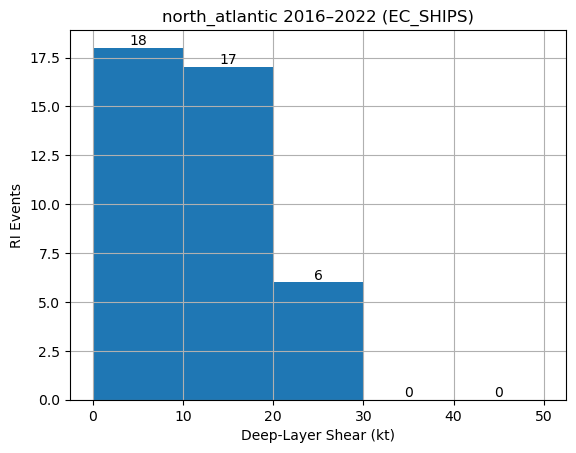

In [26]:
basin = 'north_atlantic'
ec_ships_boo = 'y' # set to 'y' if we want to use EC SHIPS

if ec_ships_boo == 'y':
    shear_RI = pd.read_csv('/Users/acheung/data/RI_Cases/RI_Events_with_EC_SHIPS_shear_'+basin+'.csv')
elif ec_ships_boo == 'n':
    shear_RI = pd.read_csv('/Users/acheung/data/RI_Cases/RI_Events_with_shear_'+basin+'.csv')

shear_RI_indexed = shear_RI.set_index(['Season','Storm_Name','Storm_ID','RI_Number'])

counts, edges, bars = plt.hist(shear_RI_indexed['Deep-Layer Shear (kt)'],bins=[0,10,20,30,40,50])
plt.grid()
plt.xlabel('Deep-Layer Shear (kt)')
plt.ylabel('RI Events')
plt.bar_label(bars)

if ec_ships_boo == 'y':
    plt.title(basin + ' ' + str(int(shear_RI['Season'].min()))+'–'+str(int(shear_RI['Season'].max())) + ' (EC_SHIPS)')
    plt.savefig('/Users/acheung/figures/histogram_RI_cases_EC_SHIPS_shear_'+basin,dpi=600)
elif ec_ships_boo == 'n':
    plt.title(basin + ' ' + str(int(shear_RI['Season'].min()))+'–'+str(int(shear_RI['Season'].max())))
    plt.savefig('/Users/acheung/figures/histogram_RI_cases_shear_'+basin,dpi=600)

In [27]:
int(shear_RI['Season'].min())

2016

In [28]:
std_shear_RI = np.std(shear_RI_indexed['Deep-Layer Shear (kt)'])
med_shear_RI = np.nanmedian(shear_RI_indexed['Deep-Layer Shear (kt)'])
mean_shear_RI = np.mean(shear_RI_indexed['Deep-Layer Shear (kt)'])
RI_shear_stats = [int(counts.sum()),mean_shear_RI,med_shear_RI,std_shear_RI]
RI_shear_stats_pd = pd.DataFrame(RI_shear_stats).transpose()
RI_shear_stats_pd.columns = ['Sample Size','Mean','Median','Standard Deviation']
RI_shear_stats_pd.index = [basin]
RI_shear_stats_pd.index.name = 'Basin'

if ec_ships_boo == 'y':
    RI_shear_stats_pd.to_csv('/Users/acheung/data/RI_Cases/stats_RI_EC_SHIPS_shear_'+basin+'.csv')
elif ec_ships_boo == 'n':
    RI_shear_stats_pd.to_csv('/Users/acheung/data/RI_Cases/stats_RI_shear_'+basin+'.csv')


In [29]:
RI_shear_stats_pd

,Sample Size,Mean,Median,Standard Deviation
Basin,,,,
north_atlantic,41.0,10.95122,10.0,6.397222


In [30]:
shear_RI.where(shear_RI['RI_Number'] == 1).dropna().shape

(32, 7)

In [31]:
shear_RI.where(shear_RI['RI_Number'] == 2).dropna().shape

(9, 7)

In [32]:
shear_RI.where(shear_RI['RI_Number'] == 3).dropna().shape

(0, 7)